In [3]:
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

df=pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/diabetes_coursework/diabetes_binary_health_indicators_BRFSS2015.csv')

unique_values={}
for i in df.columns:
    unique_values[i] = df[i].nunique()
  
pd.DataFrame(unique_values, index=['unique_values']).T

# print(df.columns)

target = df['Diabetes']
columns_to_drop = ['Education','Income','PhysActivity','Fruits','Veggies','HvyAlcoholConsump']
df1=df.drop(columns_to_drop, axis=1)
df1

df=MinMaxScaler().fit_transform(df1)
print(df.shape)


df=StandardScaler().fit_transform(df)
print(df.shape)

#  pip install imbalanced-learn


(253680, 16)
(253680, 16)


In [88]:
df1.corr()['Diabetes'].sort_values(ascending=False)


Diabetes                1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Name: Diabetes, dtype: float64

In [4]:
 """df.drop(columns=['Education','Income','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost'],inplace=True)
df """ 

"df.drop(columns=['Education','Income','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost'],inplace=True)\ndf "

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df, target,test_size=.2,random_state=42)
print('train shape: ',x_train.shape)
print('test shape: ',x_test.shape)


train shape:  (202944, 16)
test shape:  (50736, 16)


In [6]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import numpy as np

# Applying SMOTE-ENN on the training set
smote_enn = SMOTEENN(random_state=42)
x_train_enn, y_train_enn = smote_enn.fit_resample(x_train, y_train)

# Applying p-SMOTE on the training set
minority_class_ratio = 0.40  # Adjust according to your actual ratio
desired_minority_samples = int(len(x_train) * (1 - minority_class_ratio))

# Apply SMOTE with specified ratio
smote = SMOTE(sampling_strategy={1: desired_minority_samples}, random_state=42)
x_train_p_smote, y_train_p_smote = smote.fit_resample(x_train, y_train)

# Check the new class distribution
print("Original class distribution:")
print(np.bincount(y_train))
print("Class distribution after SMOTE-ENN:")
print(np.bincount(y_train_enn))
print("Class distribution after p-SMOTE:")
print(np.bincount(y_train_p_smote))  

Original class distribution:
[174595  28349]
Class distribution after SMOTE-ENN:
[174539 174586]
Class distribution after p-SMOTE:
[174595 121766]


In [28]:
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, cohen_kappa_score, accuracy_score, confusion_matrix

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    sensitivity = recall_score(y_true, y_pred, average='weighted')
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_true, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    metrics_dict = {
        "Precision": precision,
        "F1-score": f1,
        "Sensitivity (Recall)": sensitivity,
        "Specificity": specificity,
        "AUC": auc,
        "Kappa": kappa,
        "Accuracy": accuracy
    }
    
    return metrics_dict

def get_performance_scores(model, x_test, y_test):
    predicted_labels = model.predict(x_test)
    metrics = calculate_metrics(y_test, predicted_labels)
    metrics_df = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])
    return metrics_df

# LogisticRegression  classifier, x_test, y_test

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Создайте классификатор
lr = LogisticRegression(random_state=42)  # Убедитесь, что не указываете multi_class

# Оберните его в OneVsRestClassifier
classifier = OneVsRestClassifier(lr)

# Обучите классификатор на ваших данных
classifier.fit(x_train, y_train)

scores = get_performance_scores(classifier, x_test, y_test)
print("Logistic Regression:")
print(scores)

NameError: name 'get_performance_scores' is not defined

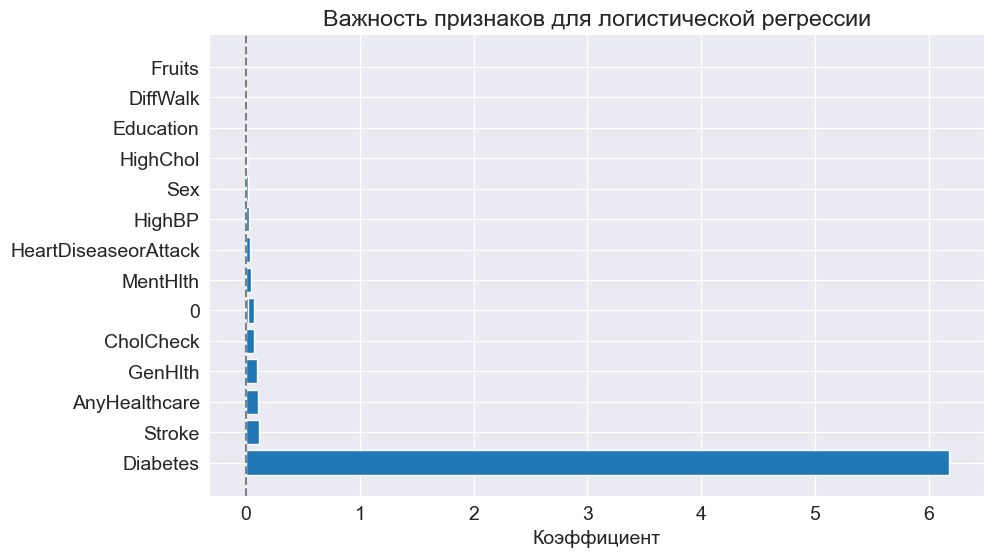

In [96]:
# теперь можем делать предсказания
predictions = classifier.predict(x_test)
# print(len(coefs))
# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Признак'], coef_df['Коэффициент'])
plt.xlabel('Коэффициент')
plt.title('Важность признаков для логистической регрессии')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

In [ ]:
import numpy as np
# Чтобы понять, какие признаки влияют на предсказания модели, используем несколько методов. 

# Коэффициенты логистической регрессии показывают как каждый признак влияет на вероятность класса.

# Получение средних коэффициентов для всех классов
# Названия признаков
feature_names = [
    'Diabetes','GenHlth', 'CholCheck', 'HighBP', 'AnyHealthcare', 'Fruits',
    'Sex', 'MentHlth', 'HighChol', 'DiffWalk', 'Stroke',
    'DiffWalk', 'Education', 'HeartDiseaseorAttack', 'Fruits', 'Veggies'
]


# Получение коэффициентов для каждого класса
coefs = np.mean([estimator.coef_[0] for estimator in classifier.estimators_], axis=0)

# Создание DataFrame для удобства
coef_df = pd.DataFrame({'Признак': feature_names, 'Коэффициент': coefs})

print(len(feature_names), len(coefs))

# Сортировка по значению коэффициента
coef_df = coef_df.sort_values(by='Коэффициент', ascending=False)


print(len(feature_names), len(coefs))

# Вывод значений коэффициентов
print(coef_df) 




In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_train, y_train)
scores = get_performance_scores(lr, x_test, y_test)
print("Logistic Regression:")
print(scores)

C:\Users\nickk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


NameError: name 'get_performance_scores' is not defined

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_train_enn, y_train_enn)
scores = get_performance_scores(lr, x_test, y_test)
print("Logistic Regression:")
print(scores)

C:\Users\nickk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression:
                 Metric  Value
0             Precision    1.0
1              F1-score    1.0
2  Sensitivity (Recall)    1.0
3           Specificity    1.0
4                   AUC    1.0
5                 Kappa    1.0
6              Accuracy    1.0


In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_train_p_smote, y_train_p_smote)
scores = get_performance_scores(lr, x_test, y_test)
print("Logistic Regression:")
print(scores)

C:\Users\nickk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression:
                 Metric  Value
0             Precision    1.0
1              F1-score    1.0
2  Sensitivity (Recall)    1.0
3           Specificity    1.0
4                   AUC    1.0
5                 Kappa    1.0
6              Accuracy    1.0


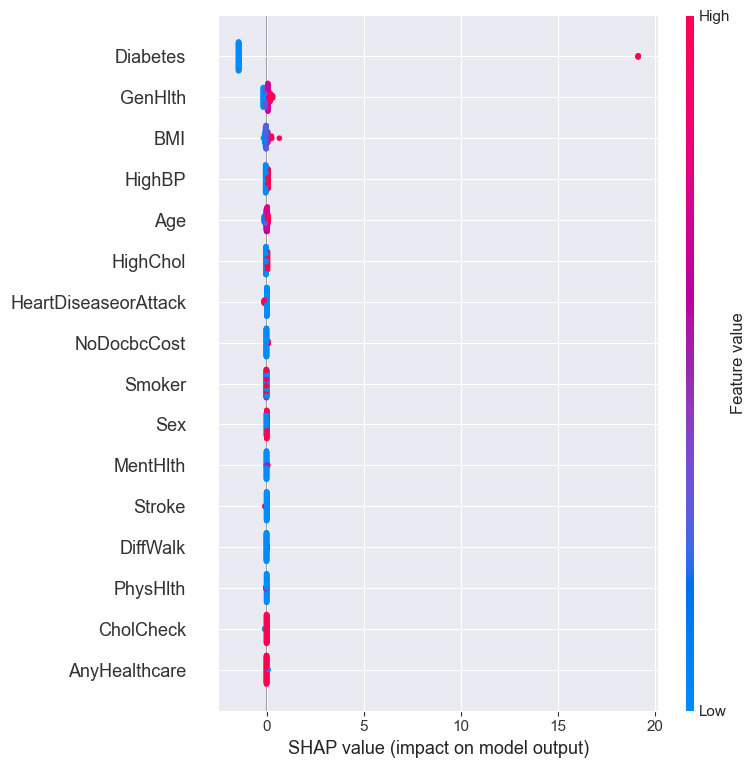

In [82]:
import shap
explainer = shap.Explainer(lr, x_train)
shap_values = explainer.shap_values(x_test[:100])
shap.summary_plot(shap_values, features=x_test[:100], feature_names=df1.columns)

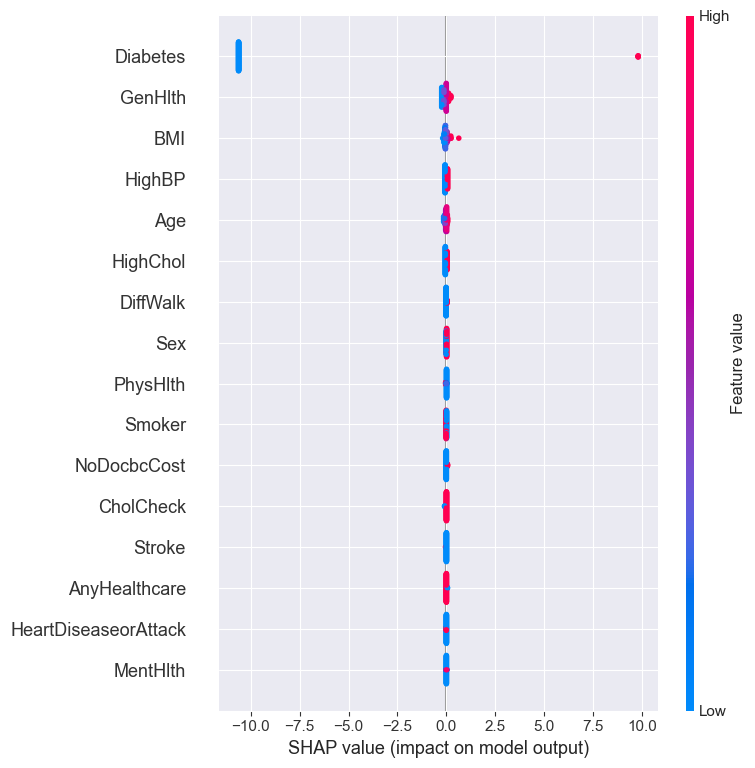

In [69]:
import shap
explainer = shap.Explainer(lr, x_train_enn)
shap_values = explainer.shap_values(x_test[:100])
shap.summary_plot(shap_values, features=x_test[:100], feature_names=df1.columns)